In [1]:
# -*- coding: utf-8 -*-
import sys, os
BIN = os.path.expanduser("../")
sys.path.append(BIN)

import pickle
import gzip
import numpy as np
import pylab as pl
import time
na = np.array
from matplotlib import pyplot as plt
#import LHCMeasurementTools.mystyle as ms
#import LHCMeasurementTools.TimberManager as tm
#import LHCMeasurementTools.LHC_Lumi as LUMI
#import LHCMeasurementTools.LHC_Lumi_bbb as LUMI_bbb
from scipy.constants import c as clight 

figsz_tuple = (12*.8, 7*.8)
save_pngs = True

In [2]:
#2017
#better BCMS BSRT after 6050->to use
#flist_BCMS_afterCalibr = [6054, 6055, 6057, 6060, 6061, 6072, 6079, 6082, 6084, 6086, 6089, 6090, 6091, 6093, 6094, 6096, 6104, 6105, 6106, 6110, 6114, 6116, 6119, 6123, 6136, 6138, 6140, 6141, 6142, 6143, 6146, 6147, 6152, 6155, 6156, 6158, 6159, 6160, 6161, 6165]
#better 8b4e BSRT after 6200->to use
#flist_8b4e = [6167, 6168, 6169, 6170, 6171, 6174, 6175, 6176, 6177, 6179, 6180, 6182, 6185, 6186, 6189, 6192, 6193, 6238, 6239, 6240, 6241, 6243, 6245, 6247, 6252, 6253, 6255, 6258, 6259, 6261, 6262, 6263] 
#better 8b4eBCS BSRT after 6310->to use
#flist_8b4eBCS= [6266, 6268, 6269,  6278, 6279, 6283, 6285, 6287, 6288, 6291, 6297, 6298, 6300, 6303, 6304, 6305, 6306, 6307, 6308, 6309, 6311, 6312, 6313, 6314, 6315, 6317, 6318, 6323, 6324, 6325, 6336, 6337, 6341, 6343, 6344, 6346, 6347, 6348, 6349, 6351, 6355, 6356, 6358, 6360, 6362, 6364, 6370, 6371] 

#2018, some trusted BSRT fills...->to use
#flist_BCMS=[6646, 6741, 6747, 6751, 6752, 6755, 6763, 6768, 6770, 6772, 6773, 6776, 6929, 6942,6946, 6953, 6957, 6960, 6961, 7005, 7006, 7013, 7018, 7020, 7031, 7035, 7037, 7039, 7040, 7069, 7078, 7080, 7090, 7091, 7092, 7105, 7221, 7234, 7309, 7317, 7320, 7321,7324, 7331, 7333, 7334]

In [3]:
filln=7334

if filln > 6500:  
    print 'fill%d,'%filln, '2018'
    theyear=2018
    if filln==7006:
        print "this fill has one beam that is missing a train (non-colliding)"    
#2017        
elif   filln >= 5246 and filln <= 6500: 
    theyear=2017
    
with gzip.open('/eos/project/l/lhc-lumimod/LuminosityFollowUp/%d/procdata/fill_%d/fill_%d.pkl.gz'%(theyear,filln, filln)) as fid:
    dict_meas = pickle.load(fid)
with gzip.open('/eos/project/l/lhc-lumimod/LuminosityFollowUp/%d/procdata/fill_%d/fill_%d_lumi_meas.pkl.gz'%(theyear,filln, filln), 'rb') as fid:
    dict_lumis = pickle.load(fid)

#case=1 or case=2 for corrected BSRT emittances 
case=2
if case == [1]:
    print "case1: BSRT as it is"
elif case == [2]:    
    print "case2: correct BSRT by multiplying the emittances by a cor. factor"
#model cases with Coupling, Noise, Boff   
#old model
#with gzip.open('/eos/project/l/lhc-lumimod/LuminosityFollowUp/%d/procdata/fill_%d/fill_%d_sbmodel_case1.pkl.gz'%(theyear,filln,filln), 'rb') as fid:
# the correct sb model for 2017 is at /afs/cern.ch/user/l/lumimod/lumimod_eos/2017/SB_analysis
# then just cp /afs/cern.ch/user/l/lumimod/lumimod_eos/2017/SB_analysis/fill_*/fill_*_sbmodel_case1.pkl.gz /eos/user/s/stpapado/2018/runModel_forFill/saved_pkl/2017/
#with gzip.open('/eos/user/s/stpapado/2018/runModel_forFill/saved_pkl/%d/fill_%d_sbmodel_case%d.pkl.gz'%(theyear,filln,case), 'rb') as fid:    
#    dict_models = pickle.load(fid)
    
#oldModel for 2018 corrected BSRT    
with gzip.open('/eos/user/s/stpapado/2018/runModel_forFill/saved_pkl/%d/fill_%d_sbmodel_case%d_oldModel.pkl.gz'%(theyear,filln,case), 'rb') as fid:
    dict_models = pickle.load(fid)       
#Coupl    
with gzip.open('/eos/user/s/stpapado/2018/runModel_forFill/saved_pkl/%d/fill_%d_sbmodel_case%d_Coupl.pkl.gz'%(theyear,filln,case), 'rb') as fid:
    dict_models_Coupl = pickle.load(fid)      
#CouplNoise    
with gzip.open('/eos/user/s/stpapado/2018/runModel_forFill/saved_pkl/%d/fill_%d_sbmodel_case%d_CouplNoise.pkl.gz'%(theyear,filln,case), 'rb') as fid:
    dict_models_CouplNoise = pickle.load(fid) 
#CouplBoff for total losses dN/N
#with gzip.open('/eos/user/s/stpapado/2018/runModel_forFill/saved_pkl/%d/fill_%d_sbmodel_case%d_CouplBoff.pkl.gz'%(theyear,filln,case), 'rb') as fid:
#    dict_models_CouplBoff = pickle.load(fid)    
#CouplNoiseBoff for total losses dN/N
#with gzip.open('/eos/user/s/stpapado/2018/runModel_forFill/saved_pkl/%d/fill_%d_sbmodel_case%d_CouplNoiseBoff.pkl.gz'%(theyear,filln,case), 'rb') as fid:
#    dict_models_CouplNoiseBoff = pickle.load(fid)   
    
#CouplBoff for burn-off dN/N
with gzip.open('/eos/user/s/stpapado/2018/runModel_forFill/saved_pkl/%d/fill_%d_sbmodel_case%d_CouplBoffcor2.pkl.gz'%(theyear,filln,case), 'rb') as fid:
    dict_models_CouplBoffcor = pickle.load(fid)    
#CouplNoiseBoff for burn-off dN/N
with gzip.open('/eos/user/s/stpapado/2018/runModel_forFill/saved_pkl/%d/fill_%d_sbmodel_case%d_CouplNoiseBoffcor2.pkl.gz'%(theyear,filln,case), 'rb') as fid:
    dict_models_CouplNoiseBoffcor = pickle.load(fid)    
    

fill7334, 2018


In [4]:
#2018
if filln > 6500:  
    thebeamtype='2018 BCMS'
    print 'fill%d,'%filln, thebeamtype
    theyear=2018
    if filln==7006:
        print "this fill has one beam that is missing a train (non-colliding)"    
#2017        
elif   filln >= 5246 and filln <= 6500: 
    theyear=2017
    if filln >= 6054 and filln <= 6165: 
        thebeamtype='2017 BCMS'
        print 'fill%d,'%filln, thebeamtype
    if filln >= 6167 and filln <= 6263:
        thebeamtype='2017 8b4e'
        print 'fill%d,'%filln, thebeamtype
    if filln >= 6266 and filln <= 6371:
        thebeamtype='2017 8b4e BCS'
        print 'fill%d,'%filln, thebeamtype

fill7334, 2018 BCMS


In [19]:
lumi_lev_ATLAS = np.mean(np.mean(na(dict_lumis['ATLAS']['bunch_lumi'])[:6,:],1))
lumi_lev_CMS = np.mean(np.mean(na(dict_lumis['CMS']['bunch_lumi'])[:6,:],1))
    
def plot_mean_and_spread(axc, x_vect, ymat,ls='-', color = 'k', alpha=1, label=None, shade=True,zorder=True):
    avg = np.nanmean(ymat, axis=1)
    std = np.nanstd(ymat, axis=1)
    axc.plot(x_vect, avg, color=color,ls=ls, linewidth=2, alpha=alpha, label=label)
    if shade:
        axc.fill_between(x_vect, avg-std, avg+std, alpha=.1, color=color)
    else:
        axc.plot(x_vect, avg-std, '--', color=color, linewidth=1, alpha=alpha)
        axc.plot(x_vect, avg+std, '--', color=color, linewidth=1, alpha=alpha)
    #~ axc.plot(x_vect, ymat, color=color, linewidth=2, alpha=0.1)
if save_pngs:
    folder_pngs = 'plots_MeasuredModel_CouplNoiseBoff_2018'
    if not os.path.exists(folder_pngs):os.makedirs(folder_pngs)
    i_png=0
        

In [5]:

#model_name = 'IBSLosses'#'ibs emittance and burn-off&extra losses'
#model_name = 'EmpiricalBlowupLosses'#'ibs&extra emittance and burn-off&extra losses'
#model_name = 'EmpiricalBlowupBOff'#'ibs&extra emittance and burn-off losses'
#model_name = 'IBSBOff'#'pure-> 'ibs emittance and burn-off losses''
#for model_name in dict_models.keys():
allmodels=['IBSBOff','IBSLosses','EmpiricalBlowupBOff','EmpiricalBlowupLosses']
#allmodels=['EmpiricalBlowupBOff']
allmodels_labels= ['Pure Model','Extra losses','Extra emit. blow up','Calculated']
#allmodels_labels= ['Pure Model','Extra emit. blow up','Extra losses','Calculated']
#allmodels_labels=['IBSBOff','IBSLosses','EmpiricalBlowupBOff','EmpiricalBlowupLosses']
colors=['grey','b','g','r']
pl.close('all')
myfontsz = 14
#ms.mystyle_arial(myfontsz)

ii=0
    
fig_lumi = pl.figure(figsize = (15,10))
fig_lumi.set_facecolor('w')
for model_name in allmodels:
    print model_name, allmodels_labels[ii]
    dict_model=dict_models[model_name]
    if model_name=='IBSBOff' or model_name=='IBSLosses': #take model with coupling for the cases we calculate emit. from IBS and we don't take them from data
        dict_model_C=dict_models_Coupl[model_name]
        #dict_model_CN=dict_models_CouplNoise[model_name]
        dict_model_CNB=dict_models_CouplNoiseBoff[model_name]
    else:
        dict_model_C=dict_model
        #dict_model_CN=dict_model
        dict_model_CNB=dict_model
        #dict_model_new=dict_model

    sharey_lumi = None
    tref_string = time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(dict_meas['time_range'][0]))

    for i_sp, experiment in enumerate('ATLAS CMS'.split()):
        ax = pl.subplot(2,1,i_sp+1, sharey=sharey_lumi)
        sharey_lumi = ax
        if ii==0:
            plot_mean_and_spread(ax, (dict_meas['time_range']-dict_meas['time_range'][0])/3600., na(dict_lumis[experiment]['bunch_lumi'])/1.0e34,ls='-',color= 'k', label='Measured')	
        plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., na(dict_model['bunch_lumi'][experiment])/1.0e34,ls='--', color=colors[ii], label=allmodels_labels[ii])
        plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., na(dict_model_C['bunch_lumi'][experiment])/1.0e34,ls=':', color=colors[ii], label='coupl.')
        #plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., na(dict_model_CN['bunch_lumi'][experiment])/1.0e34,ls='--', color=colors[ii], label='coupl.&noise')
        plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., na(dict_model_CNB['bunch_lumi'][experiment])/1.0e34,ls='-', color=colors[ii], label='coupl.&noise&boff')

        ax.set_ylim(1, None)
        ax.grid('on')
        ax.set_ylabel('Luminosity %s [$10^{34}$ Hz/$m^{2}$]'%experiment, fontsize=18)
        if experiment=='CMS':
            ax.set_xlabel('Time [h]', fontsize=18)
        ax.set_xlim(0, (dict_meas['time_range'][-1]-dict_meas['time_range'][0])/3600.)
        pl.setp(ax.get_yticklabels(), fontsize=18)
        pl.setp(ax.get_xticklabels(), fontsize=18)
        if experiment=='ATLAS':
            ax.legend(loc='upper right', fontsize=15, numpoints=1)   
    ii+=1 


IBSBOff Pure Model


NameError: name 'dict_models_CouplNoiseBoff' is not defined

<Figure size 1080x720 with 0 Axes>

In [88]:
stoppoint=50
timeCon=np.concatenate(((dict_meas['time_range'][0:stoppoint]-dict_meas['time_range'][0])/3600.,(dict_meas['time_range'][stoppoint-1:stoppoint]-dict_meas['time_range'][0])/3600.,(dict_meas['time_range'][stoppoint+1:-1]-dict_meas['time_range'][0])/3600.))
print len(timeCon)
lumiCon=np.concatenate((((na(dict_lumis['ATLAS']['bunch_lumi'])+na(dict_lumis['CMS']['bunch_lumi']))/2.0/1.0e34)[0:stoppoint],((na(dict_lumis['ATLAS']['bunch_lumi'])+na(dict_lumis['CMS']['bunch_lumi']))/2.0/1.0e34)[stoppoint+1:]))
len(lumiCon)

161


161

IBSLosses Extra losses


NameError: name 'plot_mean_and_spread' is not defined

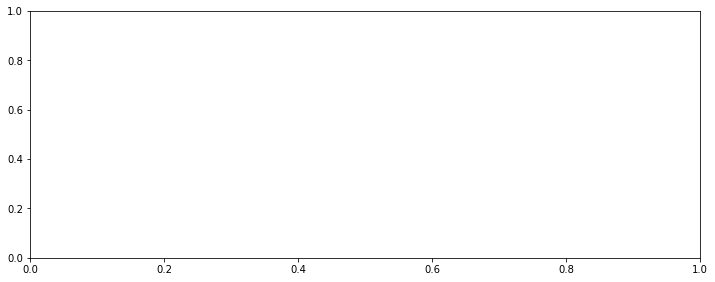

In [5]:
allmodels=['IBSLosses']#,'EmpiricalBlowupLosses']
#allmodels=['EmpiricalBlowupBOff']
allmodels_labels= ['Extra losses']#,'Calculated']
#allmodels_labels= ['Pure Model','Extra emit. blow up','Extra losses','Calculated']
#allmodels_labels=['IBSBOff','IBSLosses','EmpiricalBlowupBOff','EmpiricalBlowupLosses']
colors=['b','r']

ii=0
i_sp=0
fig_avglumi = pl.figure(figsize = (12,10))
fig_avglumi.set_facecolor('w')

for model_name in allmodels:
    print model_name, allmodels_labels[ii]
    dict_model=dict_models[model_name]
    
    sharey_lumi = None
    tref_string = time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(dict_meas['time_range'][0]))
    ax = pl.subplot(2,1,i_sp+1, sharey=sharey_lumi)
    if model_name=='EmpiricalBlowupLosses':
        print 'EmpiricalBlowupLosses'
        #plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., (na(dict_model['bunch_lumi']['ATLAS'])+na(dict_model['bunch_lumi']['CMS']))/2.0/1.0e34,ls='-', color=colors[ii], label=allmodels_labels[ii])
    if model_name=='IBSLosses':
        plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., (na(dict_model['bunch_lumi']['ATLAS'])+na(dict_model['bunch_lumi']['CMS']))/2.0/1.0e34,ls='-', color='deepskyblue', label='Model')#allmodels_labels[ii])
        #plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., na(dict_model['bunch_lumi']['ATLAS'])/1.0e34,ls='-', color='deepskyblue', label='Model ATLAS')#allmodels_labels[ii])
        #plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., na(dict_model['bunch_lumi']['CMS'])/1.0e34,ls='-', color='deepskyblue', label='Model CMS')#allmodels_labels[ii])
       
    if model_name=='IBSBOff' or model_name=='IBSLosses': #take model with coupling for the cases we calculate emit. from IBS and we don't take them from data
        #dict_model_C=dict_models_Coupl[model_name]
        dict_model_CN=dict_models_CouplNoise[model_name]
        dict_model_CBcor=dict_models_CouplBoffcor[model_name]
        #dict_model_CNB=dict_models_CouplNoiseBoff[model_name]
        dict_model_CNBcor=dict_models_CouplNoiseBoffcor[model_name]
        
        #plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., (na(dict_model_C['bunch_lumi']['ATLAS'])+na(dict_model_C['bunch_lumi']['CMS']))/2.0/1.0e34,ls=':', color=colors[ii], label='coupl.')
        #plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., (na(dict_model_CBcor['bunch_lumi']['ATLAS'])+na(dict_model_CBcor['bunch_lumi']['CMS']))/2.0/1.0e34,ls='--', color=colors[ii], label='coupl.&boff')
        #plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., (na(dict_model_CN['bunch_lumi']['ATLAS'])+na(dict_model_CN['bunch_lumi']['CMS']))/2.0/1.0e34,ls='-.', color=colors[ii], label='coupl.&noise')
        #plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., (na(dict_model_CNB['bunch_lumi']['ATLAS'])+na(dict_model_CNB['bunch_lumi']['CMS']))/2.0/1.0e34,ls='--', color=colors[ii],label='updated Model')      #label='coupl.&noise&boff')   
        plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., (na(dict_model_CNBcor['bunch_lumi']['ATLAS'])+na(dict_model_CNBcor['bunch_lumi']['CMS']))/2.0/1.0e34,ls='-', color=colors[ii],label='updated Model')      #label='coupl.&noise&boff')          
        #plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., na(dict_model_CNBcor['bunch_lumi']['ATLAS'])/1.0e34,ls='-', color=colors[ii],label='updated Model ATLAS')      #label='coupl.&noise&boff')          
        #plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., na(dict_model_CNBcor['bunch_lumi']['CMS'])/1.0e34,ls='-', color=colors[ii],label='updated Model CMS')      #label='coupl.&noise&boff')          
    
                             
    #ax.set_ylim(3, 4)
    #ax.set_xlim(0, 8)
    ax.grid('on')
    ax.set_ylabel('avg Luminosity [$10^{34}$ Hz/$m^{2}$]', fontsize=18)
    ax.set_xlabel('time [h]', fontsize=18)
    ax.set_xlim(0, (dict_meas['time_range'][-1]-dict_meas['time_range'][0])/3600.)
    pl.setp(ax.get_yticklabels(), fontsize=18)
    pl.setp(ax.get_xticklabels(), fontsize=18) 

    ii+=1  
#plot_mean_and_spread(ax,(dict_meas['time_range'][:]-dict_meas['time_range'][0])/3600., (na(dict_lumis['ATLAS']['bunch_lumi'])+na(dict_lumis['CMS']['bunch_lumi']))/2.0/1.0e34,ls='-',color= 'k', label='Measured')
plot_mean_and_spread(ax,(dict_meas['time_range'][:]-dict_meas['time_range'][0])/3600., (na(dict_lumis['ATLAS']['bunch_lumi']))/1.0e34,ls='-',color= 'k', label='Measured ATLAS')
plot_mean_and_spread(ax,(dict_meas['time_range'][:]-dict_meas['time_range'][0])/3600., (na(dict_lumis['CMS']['bunch_lumi']))/1.0e34,ls='--',color= 'k', label='Measured CMS')

#plot_mean_and_spread(ax,timeCon, lumiCon,ls='-',color= 'k', label='Measured')

ax.legend(loc='upper right', fontsize=15, numpoints=1)
#ax.legend(loc='center left', bbox_to_anchor=(1,0.6), fontsize=14, numpoints=1) 
#ax.set_xlim(0, 0.60)
ax.set_ylim(-0.5, 13)
#sharey_lumi.legend(loc='best', fontsize=14)
ax.set_title(thebeamtype+', Fill %d'%(filln), fontsize=18)
if save_pngs: fig_avglumi.savefig(folder_pngs+'/fill_%d_case%d_avglumi'%(filln,case), dpi=150); i_png+=1
#fig_lumi.savefig('Fill%d_LumiModelComp.png'%filln, dpi=150); 
pl.show()   

0 coll
coll
1 h
0.9959170919755936
1 v
0.9674837546150163
2 h
0.9915902246212017
2 v
0.9720397713196245
1 noncoll
noncoll
1 h
0.9923084355300478
1 v
0.977952502996976
2 h
0.989720773640008
2 v
0.9879591316207773


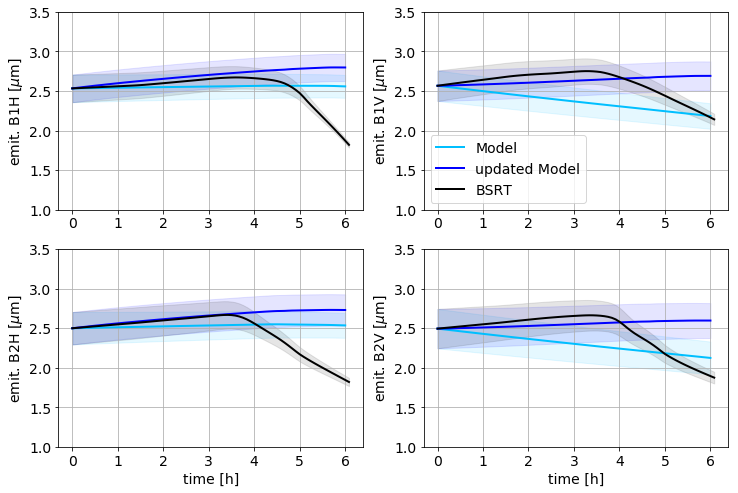

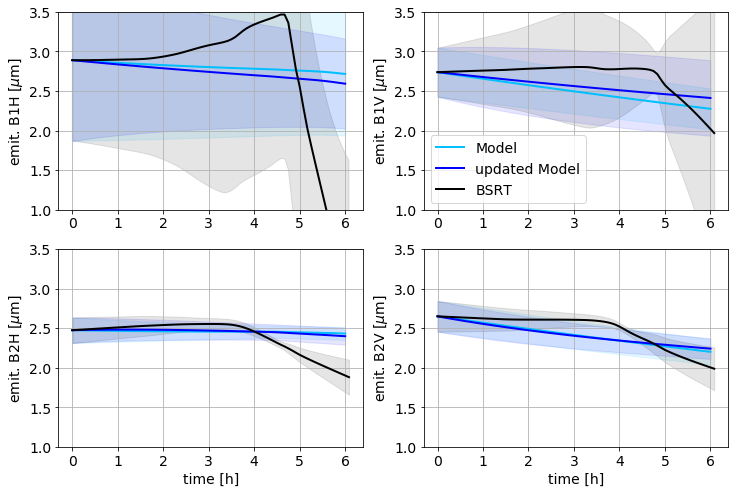

In [23]:
# 100 = uncorrected , 1.1 = 110% = +10% corr.
#c1h = 1.09;c1v = 1.1;c2h = 1.25;c2v = 1.05;    #FILL 7035
#c1h = 1.;c1v = 1.22;c2h = 1.22;c2v = 1.08; #FILL 7221
#c1h = 1.1;c1v = 1.;c2h = 1.1;c2v = 1.1;    #FILL 7334
c1h = 0.8;c1v = 0.8;c2h = 0.83;c2v = 0.87;    #FILL 6194

#c1h = 1.;c1v = 1.;c2h = 1.;c2v = 1.;   
sharex = None
sharey_emit = None
sharey_int = None
sharey_blen = None
sharey_lumi = None    
#with gzip.open('/eos/project/l/lhc-lumimod/LuminosityFollowUp/2017/procdata/fill_%d/fill_%d_sbmodel_case1.pkl.gz'%(filln, filln), 'rb') as fid:
#    dict_models = pickle.load(fid)
#with gzip.open('/eos/project/l/lhc-lumimod/LuminosityFollowUp/2018/procdata/fill_%d/fill_%d_sbmodel_case1_coupl.pkl.gz'%(filln, filln), 'rb') as fid: #pkl no coupling
#    dict_models_Coupl = pickle.load(fid)   
    
model_name='IBSLosses'    
dict_model=dict_models[model_name]    
for i_fam, family in enumerate('coll noncoll'.split()):
    fig_emit = pl.figure('emit_%s'%family, figsize = (12, 8))
    fig_emit.set_facecolor('w')
    ax_emit_list=[]
    print i_fam,family
    for ii in range(4):
        ax = pl.subplot(2,2,ii+1, sharex=sharex, sharey=sharey_emit)

        if ii==1: ax.set_title('')
        sharex = ax
        sharey_emit = ax
        ax_emit_list.append(ax)
        if ii==0:    
            print family
            #ax.set_title('%s'%family)
    i_sp = 0
    for beam_n in [1,2]:
        for plane in ['h', 'v']:
            ax = ax_emit_list[i_sp]           
            if model_name=='IBSLosses':
                dict_model_C=dict_models_Coupl[model_name]
                dict_model_CN=dict_models_CouplNoise[model_name]
                dict_model_CBcor=dict_models_CouplBoffcor[model_name]
                #dict_model_CNB=dict_models_CouplNoiseBoff[model_name]
                dict_model_CNBcor=dict_models_CouplNoiseBoffcor[model_name]
            plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., dict_model['e%s_interp_%s'%(plane, family)][beam_n],ls='-', color='deepskyblue', label='Model')
            
            #plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., dict_model_C['e%s_interp_%s'%(plane, family)][beam_n],ls=':', color='b', label='coupl.')
            #plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., dict_model_CBcor['e%s_interp_%s'%(plane, family)][beam_n],ls='--', color='b', label='coupl.&boff')
            #plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., dict_model_CN['e%s_interp_%s'%(plane, family)][beam_n],ls='-.', color='b', label='coupl.&noise')
            #plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., dict_model_CNB['e%s_interp_%s'%(plane, family)][beam_n],ls='--', color='b', label='updated Model')#'coupl.&noise&boff')
            plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., dict_model_CNBcor['e%s_interp_%s'%(plane, family)][beam_n],ls='-', color='b', label='updated Model')#'coupl.&noise&boff')

            if beam_n==1 and plane=='h':
                ccc=c1h
            elif beam_n==1 and plane=='v':
                ccc=c1v
            elif beam_n==2 and plane=='h':
                ccc=c2h
            elif beam_n==2 and plane=='v':
                ccc=c2v
            plot_mean_and_spread(ax, (dict_meas['time_range']-dict_meas['time_range'][0])/3600.,dict_meas['e%s_interp_%s'%(plane, family)][beam_n]*ccc, color='k',label='BSRT')
            ax.set_ylabel('emit. B%d%s [$\mu$m]'%(beam_n, plane.upper()), fontsize=14)
            #ax.set_title('case %d'%case)

            ax.set_ylim(1, 3.5)
            #ax.set_xlim(0, 0.6)
            
            if beam_n==1 and plane=='v':
                ax.legend(loc='best', fontsize=14, numpoints=1)
            if beam_n==2: ax.set_xlabel('time [h]', fontsize=14)
            ax.grid('on')
            
            pl.setp(ax.get_yticklabels(), fontsize=14)
            pl.setp(ax.get_xticklabels(), fontsize=14) 
            print beam_n,plane
            print np.mean(dict_model['e%s_interp_%s'%(plane, family)][beam_n][7])/np.mean(dict_meas['e%s_interp_%s'%(plane, family)][beam_n][7]*ccc)
            i_sp+=1
    if save_pngs: fig_emit.savefig(folder_pngs+'/fill_%d_emit_%s_case%d'%(filln,family,case), dpi=150);


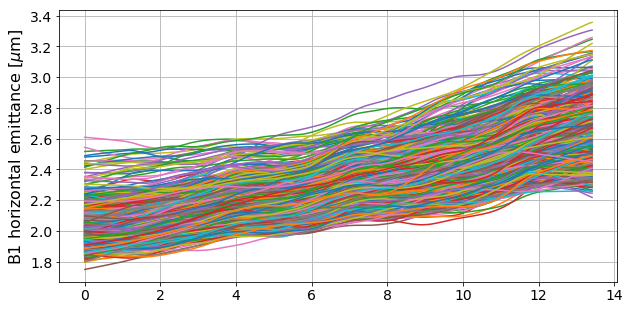

In [23]:

ti=1540301600.679
tf=1540343790.171
plt.figure(figsize=(10,5))
plt.plot((dict_meas['time_range']-dict_meas['time_range'][0])/3600.,dict_meas['e%s_interp_%s'%("h", 'coll')][1]*1.1,label='BSRT')
#plt.plot((dict_meas['time_range']-dict_meas['time_range'][0])/3600.,dict_meas['e%s_interp_%s'%("h", 'noncoll')][1]*1.1,label='BSRT')

#plt.axvline(ti, ymax=9, ymin=0, c='b', ls='--',Linewidth=3,label='Injection')
#plt.axvline(1540302826.709, ymax=9, ymin=0, c='y', ls='--',Linewidth=3,label='Ramp')
#plt.axvline(1540305416.815, ymax=9, ymin=0, c='r', ls='--',Linewidth=3,label='Collisions')
plt.ylabel('B1 horizontal emittance [$\mu$m]', fontsize=16)   
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
    
#plt.legend(loc='right')
plt.grid(b=True)


0 coll
coll
1 noncoll
noncoll


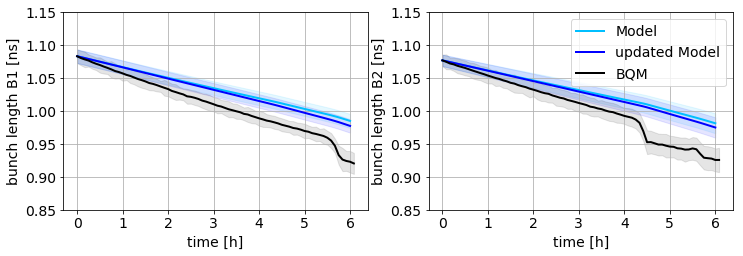

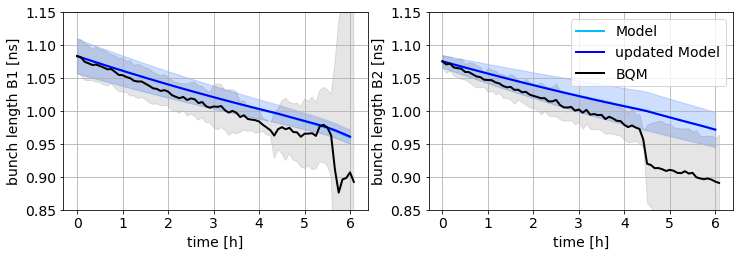

In [22]:
 # 100 = uncorrected , 1.1 = 110% = +10% corr.
#c1h = 1.09;c1v = 1.1;c2h = 1.25;c2v = 1.05;    #FILL 7035    
#c1h = 1.;c1v = 1.22;c2h = 1.22;c2v = 1.08; #FILL 7221
#c1h = 1.1;c1v = 1.;c2h = 1.1;c2v = 1.1;    #FILL 7334

#c1h = 1.;c1v = 1.;c2h = 1.;c2v = 1.;

sharex = None
sharey_emit = None
sharey_int = None
sharey_blen = None
sharey_lumi = None    
#with gzip.open('/eos/project/l/lhc-lumimod/LuminosityFollowUp/2017/procdata/fill_%d/fill_%d_sbmodel_case1.pkl.gz'%(filln, filln), 'rb') as fid:
#    dict_models = pickle.load(fid)
#with gzip.open('/eos/project/l/lhc-lumimod/LuminosityFollowUp/2018/procdata/fill_%d/fill_%d_sbmodel_case1_coupl.pkl.gz'%(filln, filln), 'rb') as fid: #pkl no coupling
#    dict_models_Coupl = pickle.load(fid)   
    
model_name='IBSLosses'    
dict_model=dict_models[model_name]    
for i_fam, family in enumerate('coll noncoll'.split()):
    fig_emit = pl.figure('emit_%s'%family, figsize = (12, 8))
    fig_emit.set_facecolor('w')
    ax_emit_list=[]
    print i_fam,family
    for ii in range(2):
        ax = pl.subplot(2,2,ii+1, sharex=sharex, sharey=sharey_emit)

        if ii==1: ax.set_title('')
        sharex = ax
        sharey_emit = ax
        ax_emit_list.append(ax)
        if ii==0:
            print family
            #ax.set_title('%s'%family)
    i_sp = 0
    for beam_n in [1,2]:
        #for plane in ['h', 'v']:
            ax = ax_emit_list[i_sp]           
            if model_name=='IBSLosses':
                dict_model_C=dict_models_Coupl[model_name]
                #dict_model_CN=dict_models_CouplNoise[model_name]
                #dict_model_CB=dict_models_CouplBoff[model_name]
                dict_model_CNB=dict_models_CouplNoiseBoffcor[model_name]     
            plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., dict_model['bl_interp_m_%s'%(family)][beam_n]/clight*4.0*1.0e9,ls='-', color='deepskyblue', label='Model')
            
            #plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., dict_model_C['bl_interp_m_%s'%(family)][beam_n],ls=':', color='b', label='coupl.')
            #plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., dict_model_CB['bl_interp_m_%s'%(family)][beam_n],ls='--', color='b', label='coupl.&boff')
            #plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., dict_model_CN['bl_interp_m_%s'%(family)][beam_n],ls='-.', color='b', label='coupl.&noise')
            plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., dict_model_CNB['bl_interp_m_%s'%(family)][beam_n]/clight*4.0*1.0e9,ls='-', color='b', label='updated Model')#'coupl.&noise&boff')

            plot_mean_and_spread(ax, (dict_meas['time_range']-dict_meas['time_range'][0])/3600.,dict_meas['bl_interp_m_%s'%(family)][beam_n]/clight*4.0*1.0e9, color='k',label='BQM')
            ax.set_ylabel('bunch length B%d [ns]'%(beam_n), fontsize=14)
            #ax.set_title('case %d'%case)

            ax.set_ylim(0.85, 1.15)
            #ax.set_xlim(0, 0.6)
            
            if beam_n==2:
                ax.legend(loc='upper right', fontsize=14, numpoints=1)
            ax.set_xlabel('time [h]', fontsize=14)
            ax.grid('on')
            
            pl.setp(ax.get_yticklabels(), fontsize=14)
            pl.setp(ax.get_xticklabels(), fontsize=14) 
            
            i_sp+=1
    if save_pngs: fig_emit.savefig(folder_pngs+'/fill_%d_bl_%s_case%d'%(filln,family,case), dpi=150);

In [16]:
with gzip.open('/eos/project/l/lhc-lumimod/LuminosityFollowUp/%d/procdata/fill_%d/fill_%d_sbmodel_case1.pkl.gz'%(theyear,filln,filln), 'rb') as fid:  
    dict_models = pickle.load(fid)

In [23]:
dict_models['EmpiricalBlowupBOff']

{'b_inten_interp_coll': {1: array([[1.78014250e+11, 1.36719575e+11, 1.43774496e+11, ...,
          1.37553068e+11, 1.26867733e+11, 1.32444918e+11],
         [1.77253271e+11, 1.36284850e+11, 1.43309448e+11, ...,
          1.37118047e+11, 1.26475163e+11, 1.32031784e+11],
         [1.76499512e+11, 1.35852987e+11, 1.42847448e+11, ...,
          1.36686351e+11, 1.26085542e+11, 1.31621830e+11],
         ...,
         [1.36965252e+11, 1.11030018e+11, 1.16332924e+11, ...,
          1.12701768e+11, 1.04339951e+11, 1.08880716e+11],
         [1.36452606e+11, 1.10664500e+11, 1.15943886e+11, ...,
          1.12368259e+11, 1.04034825e+11, 1.08564002e+11],
         [1.35938966e+11, 1.10296776e+11, 1.15552529e+11, ...,
          1.12033459e+11, 1.03728356e+11, 1.08245992e+11]]),
  2: array([[1.82322416e+11, 1.48366894e+11, 1.52324751e+11, ...,
          1.31271075e+11, 1.27064847e+11, 1.28424857e+11],
         [1.81561360e+11, 1.47932061e+11, 1.51859620e+11, ...,
          1.30836120e+11, 1.26672275e+

0 coll
1.0036009212205905
0.9976221823256751
1 noncoll
1.0
1.0


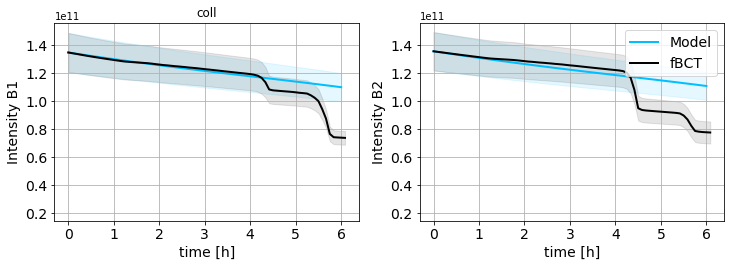

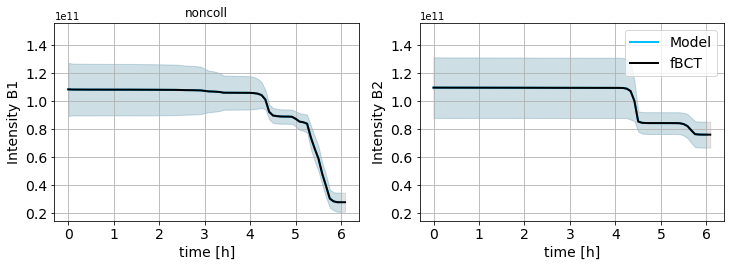

In [21]:
 # 100 = uncorrected , 1.1 = 110% = +10% corr.
#c1h = 1.09;c1v = 1.1;c2h = 1.25;c2v = 1.05;    #FILL 7035    
#c1h = 1.;c1v = 1.22;c2h = 1.22;c2v = 1.08; #FILL 7221
#c1h = 1.1;c1v = 1.;c2h = 1.1;c2v = 1.1;    #FILL 7334

#c1h = 1.;c1v = 1.;c2h = 1.;c2v = 1.;

sharex = None
sharey_emit = None
sharey_int = None
sharey_blen = None
sharey_lumi = None    
#with gzip.open('/eos/project/l/lhc-lumimod/LuminosityFollowUp/2017/procdata/fill_%d/fill_%d_sbmodel_case1.pkl.gz'%(filln, filln), 'rb') as fid:
#    dict_models = pickle.load(fid)
#with gzip.open('/eos/project/l/lhc-lumimod/LuminosityFollowUp/2018/procdata/fill_%d/fill_%d_sbmodel_case1_coupl.pkl.gz'%(filln, filln), 'rb') as fid: #pkl no coupling
#    dict_models_Coupl = pickle.load(fid)   
    
model_name='IBSLosses'    
dict_model=dict_models[model_name]    
for i_fam, family in enumerate('coll noncoll'.split()):
    fig_emit = pl.figure('emit_%s'%family, figsize = (12, 8))
    fig_emit.set_facecolor('w')
    ax_emit_list=[]
    print i_fam,family
    for ii in range(2):
        ax = pl.subplot(2,2,ii+1, sharex=sharex, sharey=sharey_emit)

        if ii==1: ax.set_title('')
        sharex = ax
        sharey_emit = ax
        ax_emit_list.append(ax)
        if ii==0:    
            ax.set_title('%s'%family)
    i_sp = 0
    for beam_n in [1,2]:
        #for plane in ['h', 'v']:
            ax = ax_emit_list[i_sp]           
            if model_name=='IBSLosses':
                dict_model_C=dict_models_Coupl[model_name]
                #dict_model_CN=dict_models_CouplNoise[model_name]
                #dict_model_CB=dict_models_CouplBoff[model_name]
                dict_model_CNB=dict_models_CouplNoiseBoffcor[model_name]     
            plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., dict_models['EmpiricalBlowupBOff']['b_inten_interp_%s'%(family)][beam_n],ls='-', color='deepskyblue', label='Model')
            
            #plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., dict_model_C['bl_interp_m_%s'%(family)][beam_n],ls=':', color='b', label='coupl.')
            #plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., dict_model_CB['bl_interp_m_%s'%(family)][beam_n],ls='--', color='b', label='coupl.&boff')
            #plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., dict_model_CN['bl_interp_m_%s'%(family)][beam_n],ls='-.', color='b', label='coupl.&noise')
            #plot_mean_and_spread(ax, (dict_meas['time_range'][:-1]-dict_meas['time_range'][0])/3600., dict_model_CNB['bl_interp_m_%s'%(family)][beam_n]/clight*4.0*1.0e9,ls='-', color='b', label='updated Model')#'coupl.&noise&boff')

            plot_mean_and_spread(ax, (dict_meas['time_range']-dict_meas['time_range'][0])/3600.,dict_meas['b_inten_interp_%s'%(family)][beam_n], color='k',label='fBCT')
            ax.set_ylabel('Intensity B%d'%(beam_n), fontsize=14)
            #ax.set_title('case %d'%case)

            #ax.set_ylim(0.4e11, 1.1e11)
            #ax.set_xlim(0, 0.6)
            
            if beam_n==2:
                ax.legend(loc='upper right', fontsize=14, numpoints=1)
            ax.set_xlabel('time [h]', fontsize=14)
            ax.grid('on')
            
            pl.setp(ax.get_yticklabels(), fontsize=14)
            pl.setp(ax.get_xticklabels(), fontsize=14) 
            print (np.mean(dict_models['EmpiricalBlowupBOff']['b_inten_interp_%s'%(family)][beam_n][7])/np.mean(dict_meas['b_inten_interp_%s'%(family)][beam_n][7]))
            i_sp+=1
    if save_pngs: fig_emit.savefig(folder_pngs+'/fill_%d_int_%s_case%d'%(filln,family,case), dpi=150);

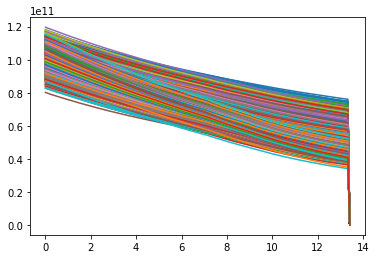

In [8]:
plt.plot((dict_meas['time_range'][:]-dict_meas['time_range'][0])/3600.,dict_meas['b_inten_interp_coll'][1])
plt.show()

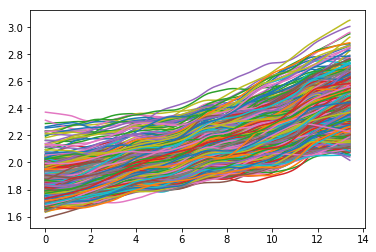

In [9]:
plt.plot((dict_meas['time_range'][:]-dict_meas['time_range'][0])/3600.,dict_meas['eh_interp_coll'][1])
plt.show()

In [5]:
model_name='IBSLosses'
dict_model_C=dict_models_Coupl[model_name]
dict_model_CN=dict_models_CouplNoise[model_name]
dict_model_CB=dict_models_CouplBoff[model_name]
dict_model_CNB=dict_models_CouplNoiseBoff[model_name]
dict_model_CNBcor=dict_models_CouplNoiseBoffcor[model_name]

In [7]:
print dict_model_CNB['boffParams'].keys()
print dict_model_CNB['noiseParams'].keys()

['dboff_v', 'dboff_h']
['xi_v', 'dexNoise_h', 'dBPM_h', 'dexNoise_v', 'dBPM_v', 'xi_h']


In [46]:
print np.nanmean(dict_model_CNB['noiseParams']['dexNoise_h'][1])*60./5.*1e6
print np.nanmean(dict_model_CNB['noiseParams']['dexNoise_v'][1])*60./5.*1e6
print np.nanmean(dict_model_CNB['noiseParams']['dexNoise_h'][2])*60./5.*1e6
print np.nanmean(dict_model_CNB['noiseParams']['dexNoise_v'][2])*60./5.*1e6

0.03922827389272886
0.05665165458196322
0.03575924991540785
0.04890797825624974


In [48]:
print np.nanmean(dict_model_CNB['boffParams']['dboff_h'][1])*1e6
print np.nanmean(dict_model_CNB['boffParams']['dboff_v'][1])*1e6
print np.nanmean(dict_model_CNB['boffParams']['dboff_h'][2])*1e6
print np.nanmean(dict_model_CNB['boffParams']['dboff_v'][2])*1e6

0.0029182693600009234
0.0028029814944588345
0.0026664088195673587
0.002561375179547791


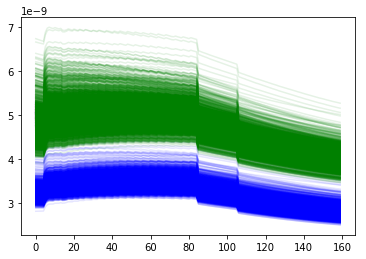

In [14]:
plt.plot(dict_model_CNB['noiseParams']['dexNoise_h'][1],'b',alpha=0.1)
plt.plot(dict_model_CNB['noiseParams']['dexNoise_v'][1],'g',alpha=0.1)
plt.show()

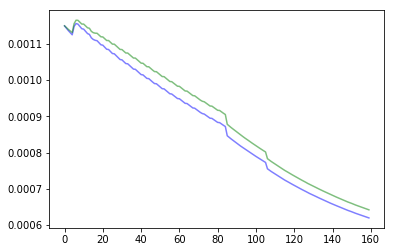

In [17]:
plt.plot(dict_models_CouplNoiseBoff['IBSLosses']['noiseParams']['xi_h'][1]*0.168,'b',alpha=0.5)
plt.plot(dict_models_CouplNoiseBoff['IBSLosses']['noiseParams']['xi_v'][1]*0.168,'g',alpha=0.5)
plt.show()

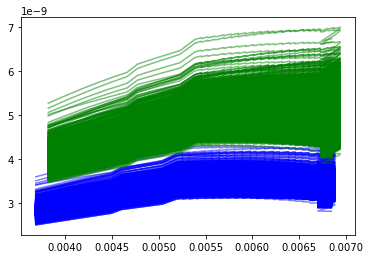

In [8]:
plt.plot(dict_models_CouplNoiseBoff['IBSLosses']['noiseParams']['xi_h'][1],dict_models_CouplNoiseBoff['IBSLosses']['noiseParams']['dexNoise_h'][1],'b',alpha=0.5)
plt.plot(dict_models_CouplNoiseBoff['IBSLosses']['noiseParams']['xi_v'][1],dict_models_CouplNoiseBoff['IBSLosses']['noiseParams']['dexNoise_v'][1],'g',alpha=0.5)
plt.show()

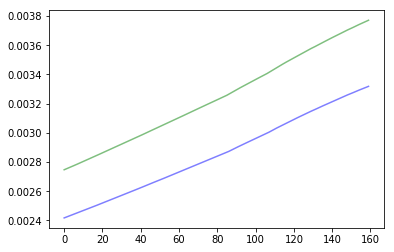

In [58]:
plt.plot(dict_model_CNB['noiseParams']['dBPM_h'][1],'b',alpha=0.5)
plt.plot(dict_model_CNB['noiseParams']['dBPM_v'][1],'g',alpha=0.5)
plt.show()

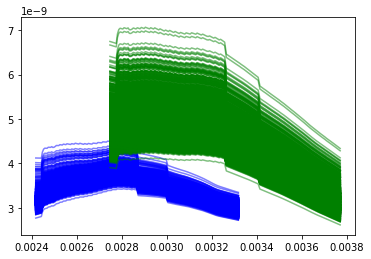

In [61]:
plt.plot(dict_model_CNB['noiseParams']['dBPM_h'][1],dict_model_CNB['noiseParams']['dexNoise_h'][1],'b',alpha=0.5)
plt.plot(dict_model_CNB['noiseParams']['dBPM_v'][1],dict_model_CNB['noiseParams']['dexNoise_v'][1],'g',alpha=0.5)
plt.show()

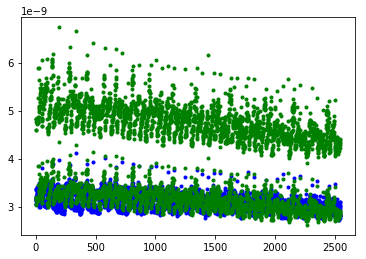

In [45]:
plt.plot(dict_model_CNB['noiseParams']['dexNoise_h'][1][1,:],'.b')
plt.plot(dict_model_CNB['noiseParams']['dexNoise_h'][1][-1,:],'.b')

plt.plot(dict_model_CNB['noiseParams']['dexNoise_v'][1][1,:],'.g')
plt.plot(dict_model_CNB['noiseParams']['dexNoise_v'][1][-1,:],'.g')

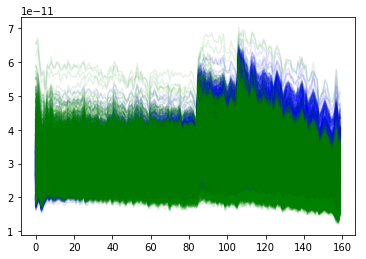

In [52]:
plt.plot(dict_model_CNB['boffParams']['dboff_h'][1],'b',alpha=0.1)
plt.plot(dict_model_CNB['boffParams']['dboff_v'][1],'g',alpha=0.1)
plt.show()